# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
main_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = main_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | nova vicosa
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | san fernando
Processing Record 5 of Set 1 | quelimane
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | liwale
Processing Record 8 of Set 1 | queenstown
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | padangsidempuan
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | sao vicente
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | el granada
Processing Record 15 of Set 1 | taoudenni
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | whitehorse
Processing Re

In [6]:
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 61.6864, 'lon': 53.6902},
 'dt': 1699468699,
 'id': 478050,
 'main': {'feels_like': 30.13,
          'grnd_level': 988,
          'humidity': 97,
          'pressure': 1003,
          'sea_level': 1003,
          'temp': 34.47,
          'temp_max': 34.47,
          'temp_min': 34.47},
 'name': "Ust'-Kulom",
 'sys': {'country': 'RU', 'sunrise': 1699416787, 'sunset': 1699445089},
 'timezone': 10800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 248, 'gust': 16.44, 'speed': 4.83}}


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,21.70,93,100,11.18,RU,1699468549
1,nova vicosa,-17.8919,-39.3719,78.19,54,0,9.98,BR,1699468549
2,hawaiian paradise park,19.5933,-154.9731,76.51,78,75,5.75,US,1699468549
3,san fernando,15.0286,120.6898,80.33,87,27,4.12,PH,1699468549
4,quelimane,-17.8786,36.8883,79.45,85,69,6.64,MZ,1699468550


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,21.70,93,100,11.18,RU,1699468549
1,nova vicosa,-17.8919,-39.3719,78.19,54,0,9.98,BR,1699468549
2,hawaiian paradise park,19.5933,-154.9731,76.51,78,75,5.75,US,1699468549
3,san fernando,15.0286,120.6898,80.33,87,27,4.12,PH,1699468549
4,quelimane,-17.8786,36.8883,79.45,85,69,6.64,MZ,1699468550


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

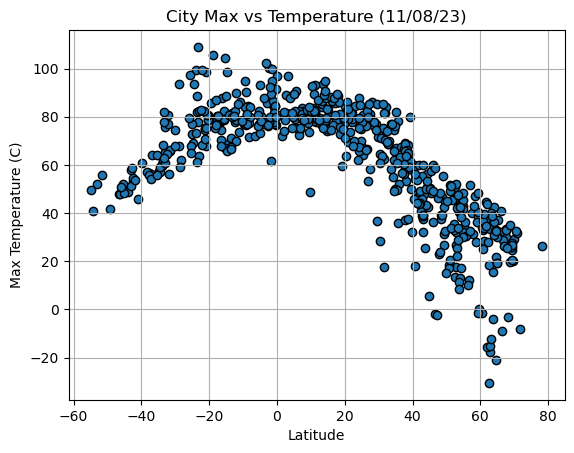

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth=1, marker="o")

# Incorporate the other graph properties
plt.title("City Max vs Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

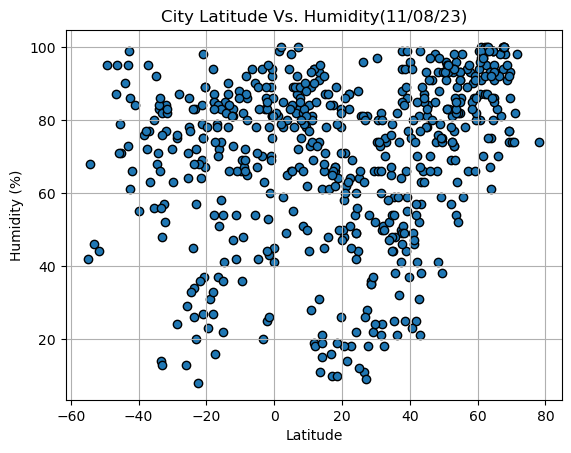

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

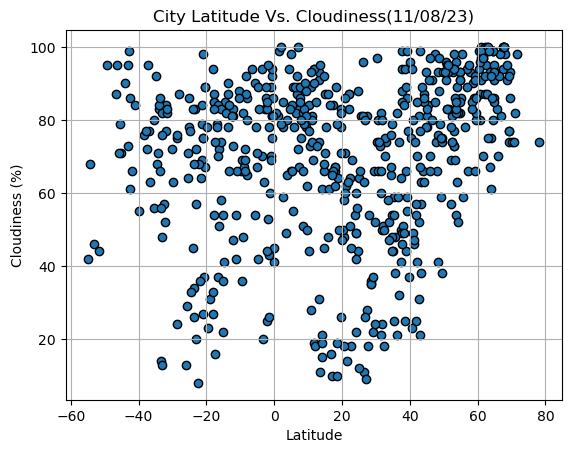

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

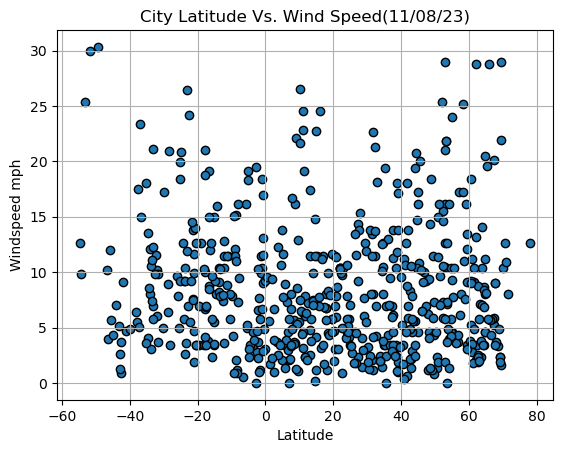

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolor="black", linewidths=1, marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Windspeed mph")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,21.70,93,100,11.18,RU,1699468549
2,hawaiian paradise park,19.5933,-154.9731,76.51,78,75,5.75,US,1699468549
3,san fernando,15.0286,120.6898,80.33,87,27,4.12,PH,1699468549
8,padangsidempuan,1.3667,99.2667,72.12,99,100,1.68,ID,1699468551
11,kodiak,57.7900,-152.4072,31.51,93,20,8.05,US,1699468551


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nova vicosa,-17.8919,-39.3719,78.19,54,0,9.98,BR,1699468549
4,quelimane,-17.8786,36.8883,79.45,85,69,6.64,MZ,1699468550
5,liwale,-9.7667,37.9333,77.09,66,6,7.85,TZ,1699468550
6,queenstown,-31.8976,26.8753,56.21,84,77,10.18,ZA,1699468550
7,port-aux-francais,-49.3500,70.2167,41.52,95,99,30.33,TF,1699468550


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.84990558212057


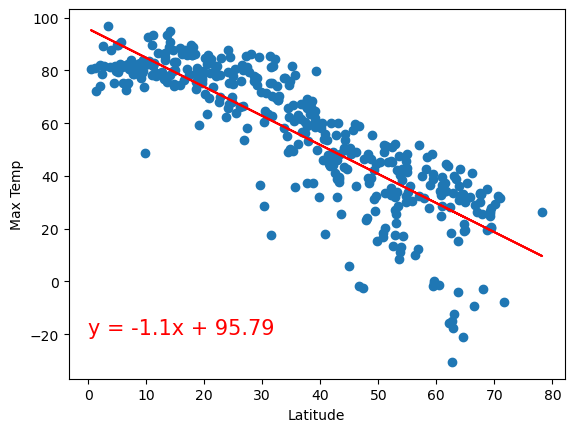

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere ["Lat"]
y_values = northern_hemisphere ["Max Temp"]
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,-20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.7042324804890571


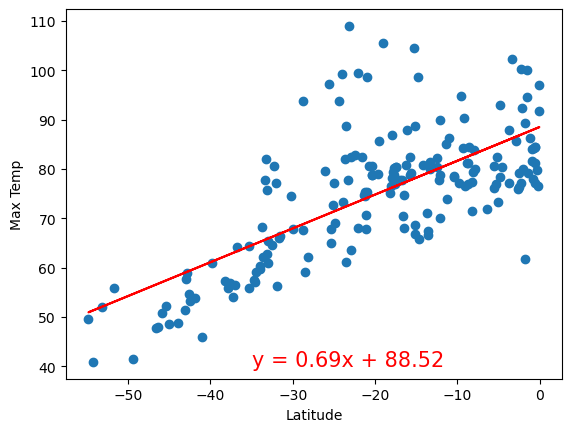

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere ["Lat"]
y_values = southern_hemisphere ["Max Temp"]
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-35,40), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
Discussion about the linear relationship: YOUR RESPONSE HERE:
There is a negative correlation between the northern hemispheres latitude and max temperateure. The lower the latitude, the higher the temperature. 
On the contrary, the southern hemisphere has a positive correlation. The higher the latitude, the higher the temperature

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11486194648175693


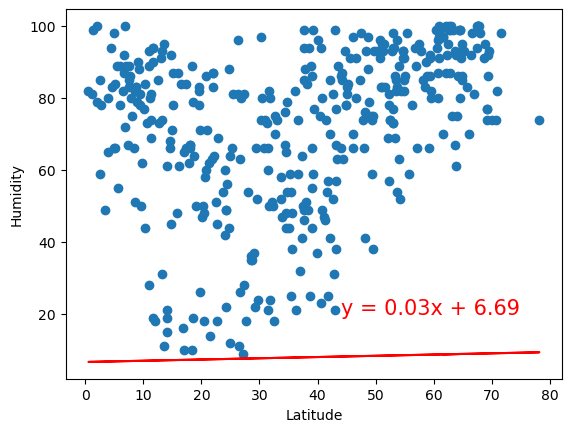

In [55]:
# Northern Hemisphere
# Linear regression on Southern Hemisphere
x_values = northern_hemisphere ["Lat"]
y_values = northern_hemisphere ["Humidity"]
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (44,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.006541879004448066


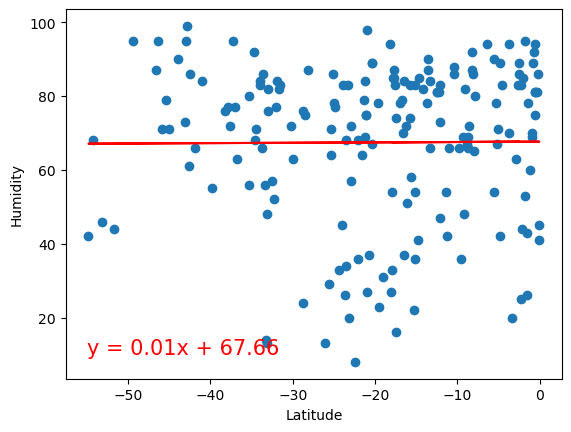

In [34]:
# Southern Hemisphere
x_values = southern_hemisphere ["Lat"]
y_values = southern_hemisphere ["Humidity"]
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
There is no direct correlation between latitude and humidity for either the northern or southern hemisphere cities.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11486194648175693


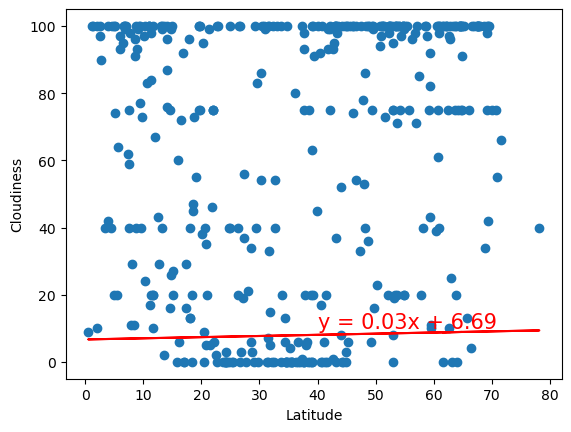

In [73]:
# Northern Hemisphere
x_values = northern_hemisphere ["Lat"]
y_values = northern_hemisphere ["Cloudiness"]
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.07321252005030582


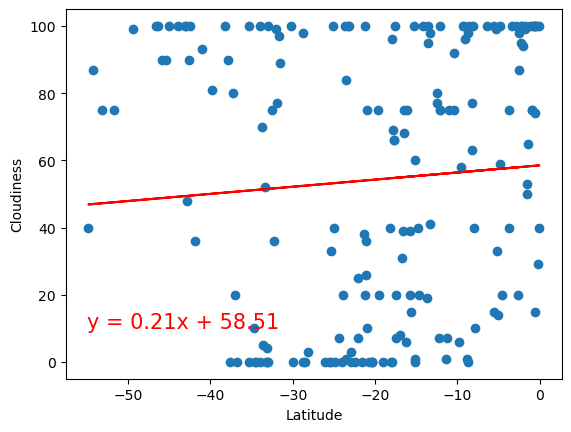

In [49]:
# Southern Hemisphere
x_values = southern_hemisphere ["Lat"]
y_values = southern_hemisphere ["Cloudiness"]
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,10), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
There is no direct correaltion between the latitude and cloudiness for either the northern or southern hemisphere cities 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11486194648175693


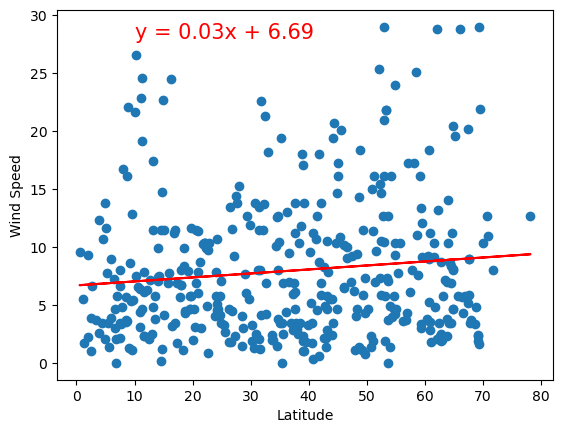

In [72]:
# Northern Hemisphere
x_values = northern_hemisphere ["Lat"]
y_values = northern_hemisphere ["Wind Speed"]
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,28), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.17320164570293267


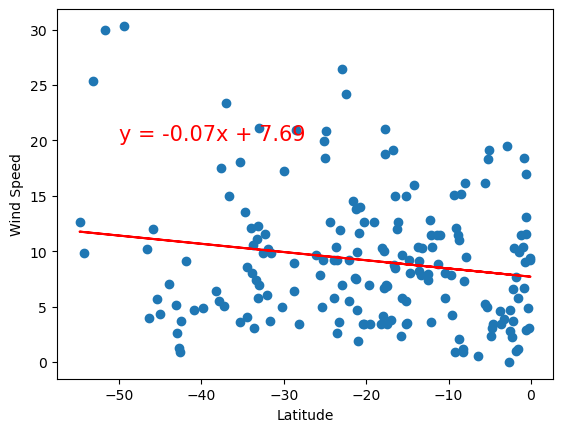

In [69]:
# Southern Hemisphere
x_values = southern_hemisphere ["Lat"]
y_values = southern_hemisphere ["Wind Speed"]
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

In [ ]:
There is no direct correlation between the latitude and speeds of wind for either the southern or nprthern hemisphere cities 

**Discussion about the linear relationship:** YOUR RESPONSE HERE